# Deterministic Modelling in the Theory of Contagious Disease

This notebook walks through the paper "Deterministic model in the theory of contagious disease," by Caldwell, J. and Yan, T.H., published in; Int. J. Math. Educ. Sci. Techol., 31, 2000, 249-260.

In this notebook we will summarize some of the work done and build some of the mathematical models authored in the paper.

## Modelling Contagious Disease

Let _t_ be the independent variable, $I(t)$ and $S(t)$ be continuous where:

$S(t) = $ number of susceptibles at time _t_.

$I(t) = $ number of infectives at time _t_.

Making a significant assumption that the rate of occurrence of new infections is proportional to both the number of infectives and succeptables:

$I(t+\Delta t)=I(t)+\beta I(t)S(t)\Delta t$

where $\beta$ is the infection rate (contact rate), in the limit as $\Delta t \to 0$, which yeilds:

$ \displaystyle \frac{dI}{dt} = \displaystyle \beta S(t)I(t)$

with initial conditions $S(0)=n, I(0)=a$

The total population size is $n + a$, all individuals are either infected or succeptable and $S(t)+I(t)=n+a$ for all _t_ and it follows that:

$ \displaystyle \frac{dI}{dt} = \displaystyle \beta I(t){n + a - I(t)}$

In Caldwell and Rams' intial work, the above model was used to achieve highly accurate results. In this work they introduced the third variable $R(t)$ to represent the removal of individuals from the infected population by means of isolation, death, reovery and immunity, at a given time _t_, which is a much more realistic and general model of a epidemic.

The following assumptions are made for this improved model:
-  Removals include infectives who are isolated, dead, recovered and immune;
-  The immune or recovered individuals enter a new class where they are not succeptable.

let:
-  $R(t)=$ the number removals at time _t_.

-  $\beta =$ the infection rate.

-  $\gamma =$ the removal rate.

-  $n=$ the size of the community.

we now have:

$S(t) + I(t) + R(t) = n$

The number of succeptables is only proportional to the number of infectives and the number of succeptables. If infectives are removed from the system/community they will not continue the spread. The differential equation describes the rate of change of transmition between the infective and succeptables given a contant infection rate, and this will be negative which makes sense here as the disease spreads the succeptable population will decrease:

$ \displaystyle \frac{dS(t)}{dt} = \displaystyle -\beta S(t)I(t)$

The removals should be considered for the DE for the infectives as the removals include infectives who are isolated, dead or recovered and immune. The immune and or recovered would then enter a new class that are not succeptable to the disease. Our infective population should grow as we have the population flowing from the succeptable group and into the infective and then we need to account for removals by subtracting the removal rate times the infectives:

$ \displaystyle \frac{dI}{dt} = \displaystyle \beta S(t)I(t) - \gamma I(t)$

The number of removals, or those removed from the infectives by means of death, immunization and cured with the removal rate $\gamma$:

$ \displaystyle \frac{dR(t)}{dt} = \displaystyle \gamma I(t)$

Now let's use scipys odeint function to solve our system of DE's and plot our model results.

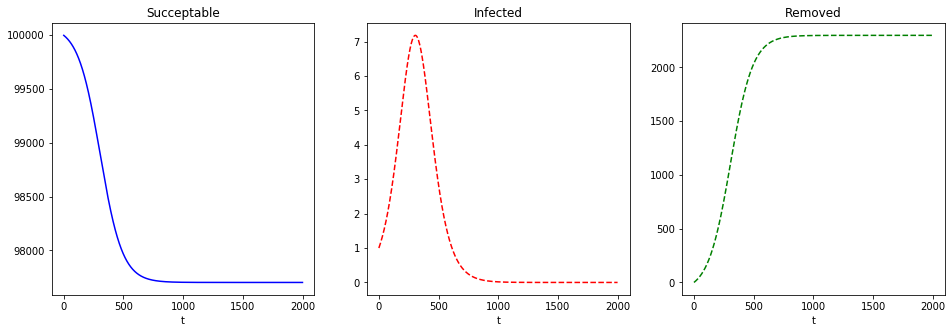

In [1]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint

beta = 9e-6 # Infection (contact) rate
gamma = 0.89 # removal rate (cured, immunized, death)

def contagious_disease(x, t):
    S = x[0] # Succeptable
    I = x[1] # Infected
    R = x[2] # Removed
    dSdt = -beta * S *I
    dIdt = (beta * S * I) - (gamma * I)
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Our initial conditions: 99999 succeptable, 1 infected, 0 removed.
x0 = [99999, 1, 0]

t = range(2000)
res = odeint(contagious_disease, x0, t)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,5))
ax1.plot(t,res[:,0],'b-')
ax1.set_title('Succeptable')
ax1.set_xlabel('t')
ax2.plot(t,res[:,1],'r--')
ax2.set_title('Infected')
ax2.set_xlabel('t')
ax3.plot(t,res[:,2],'g--')
ax3.set_title('Removed')
ax3.set_xlabel('t')
plt.show()

Running the model with $\beta = 9\times10^{-6}$ and $\gamma = 0.89$ for 2000 days we can see that the number of removals grows exponentially and then plateaus at around the 1000th day mark. This indicating that the number removals stabilizes and at this threshold no additional removals occur.

Now let's look at how varying the Infection rate ($\beta$) and Removal rate ($\gamma$) effect our model.

## Varying Infection Rate ($\beta$)

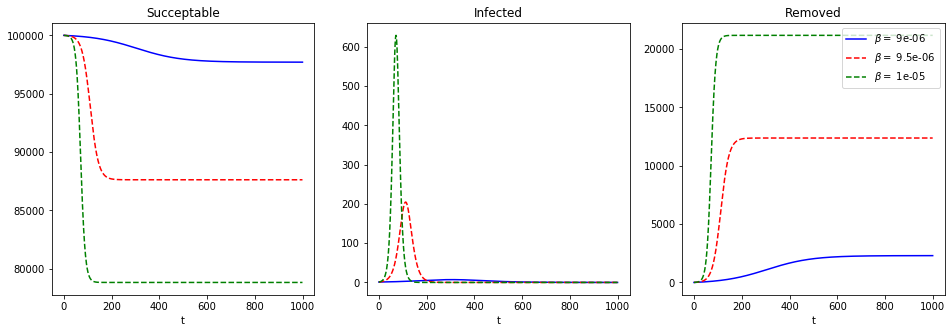

In [6]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,5))
for idx, beta in enumerate([9e-6, 9.5e-6, 1e-5]): # Infection (contact) rate # 1e-5
    
    gamma = 0.89 # removal rate (cured, immunized, death)
    
    def contagious_disease(x, t):
        S = x[0] # Succeptable
        I = x[1] # Infected
        R = x[2] # Removed
        dSdt = -beta * S *I
        dIdt = (beta * S * I) - (gamma * I)
        dRdt = gamma * I
        return [dSdt, dIdt, dRdt]
    
    # Our initial conditions: 99999 succeptable, 1 infected, 0 removed.
    x0 = [99999, 1, 0]

    t = range(1000)
    res = odeint(contagious_disease, x0, t)
    cols = ['b-', 'r--', 'g--']
    axs = [ax1, ax2, ax3]
    titles = ['Succeptable', 'Infected', 'Removed']
    for i in range(3):
        axs[i].plot(t,res[:,i],cols[idx],label=r'$\beta=$ ' + str(beta))
        axs[i].set_title(titles[i])
        axs[i].set_xlabel('t')
        
plt.legend(loc='upper right')
plt.show()

Running three different infection rates through our model we can see that as the infection rate increases as does the gradient of our curves and the shorter time taken to plateau for succeptables and removed individuals. 

## Varying Removal Rate ($\gamma$)

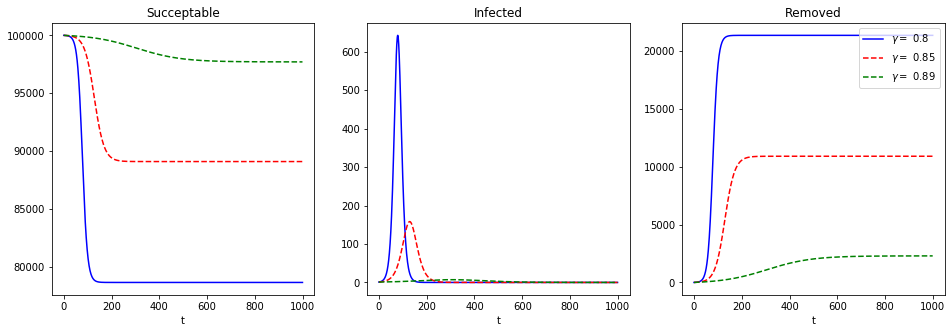

In [3]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,5))
for idx, gamma in enumerate([0.8, 0.85, 0.89]): # removal rate
    
    beta = 9e-6 # infection rate
    
    def contagious_disease(x, t):
        S = x[0] # Succeptable
        I = x[1] # Infected
        R = x[2] # Removed
        dSdt = -beta * S *I
        dIdt = (beta * S * I) - (gamma * I)
        dRdt = gamma * I
        return [dSdt, dIdt, dRdt]
    
    # Our initial conditions: 99999 succeptable, 1 infected, 0 removed.
    x0 = [99999, 1, 0]

    t = range(1000)
    res = odeint(contagious_disease, x0, t)
    cols = ['b-', 'r--', 'g--']
    axs = [ax1, ax2, ax3]
    titles = ['Succeptable', 'Infected', 'Removed']
    for i in range(3):
        axs[i].plot(t,res[:,i],cols[idx],label=r'$\gamma=$ ' + str(gamma))
        axs[i].set_title(titles[i])
        axs[i].set_xlabel('t')
        
plt.legend(loc='upper right')
plt.show()

Again we see a pretty clear effect as we reduce the removal rate the steeper the curves gradient and the shorter time it takes to plateau.

<u>References</u>

_Caldwell, J. and Yan, T.H., "Deterministic model in the theory of contagious disease," Int. J. Math. Educ. Sci. Techol., 31, 2000, 249-260._